<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Кира! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Привет! Приятно познакомиться. Благодарю за ревью и оооочень крутые и понятные коментарии. Постаралась все учесть)

</div>

# Прекод

# Сборный проект-4

Нам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## Загрузим необходимые библиотеки

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [1]:
pip install -U "transformers>=4.39.0" accelerate pillow tqdm -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import random
import re
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from collections import Counter
from pathlib import Path 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, callbacks
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image

# Фиксируем рандом
np.random.seed(42)
tf.random.set_seed(42)

# Размерность вектора изображений (ResNet50)
img_vec_size = 2048

2025-11-23 15:21:35.397494: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

# Исследовательский анализ данных

## Загрузим и просмотрим все входные данные

In [3]:
DATA_PATH = "/Users/kiradejko/SB5"

train_dataset=pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
test_queries = pd.read_csv(os.path.join(DATA_PATH,'test_queries.csv'), sep='|', index_col=0)
crowd_annotations = pd.read_csv(os.path.join(DATA_PATH,'CrowdAnnotations.tsv'), sep='\t', names= ['image', 'query_id', 'prop_conf', 'col_conf', 'col_not_conf'])
expert_annotations = pd.read_csv(os.path.join(DATA_PATH,'ExpertAnnotations.tsv'), sep='\t', names= ['image', 'query_id', 'expert_1', 'expert_2', 'expert_3' ])

train_img_dir = "/Users/kiradejko/SB5/train_images/"
test_img_dir  = "/Users/kiradejko/SB5/test_images/"

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Очень "больная тема" - это загрузка данных и использование путей.Очевидно, что на моей машине (и скорее всего машине любого другого пользователя) пути к данным будут другие. И это "рабочая ситуация для большинства проектов. Решается она следующим образом:
 
    
  - Путь к директории с данными  должен быть задан в константе, в самом начале работы. Тогда ревьюеру (или любому другому пользователю твоего ноутбука, даже тебе самому, если нужно будет провести презентацию руководителю на другом компьютере) нужно будет изменить только этот путь.
  - Все остальные пути внутри ноутбука должны быть созданы с исопользованием этой константы, а не заданы жестко (есть сленговое определение "хардкод").  Более  того, настоятельно рекомендую для создания сложных путей вместо простой конкатерации строк с исползованием '/' использовать os.path.join(), тогда код будет одинаково надежно работать и в среде Windows и Linux (MacOS).
   
Чтобы запустить твой код при проверке я был вынужден руками менять код по всему ноутбуку. Прошу тебя внести изменения так, чтобы путь к данным нужно было изменять всего один раз.


А вот это образец универсального кода для загрузки данных    
    
    DATA_PATH = твой путь    
    
    df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
    ....
    
----------------------
    
ВАЖНО:  константы с путями лучше определить один раз.  В текущей версии проекта ты определяешь пути к папкам с изображениями ТРИ (!!!!) раза. И это явный артефакт использования AI-помощников. Они могут писать локально-корректный код, но они не видят всего контекста проекта в целом. И понятия не имеют, что ты уже определила эти пути.  Поэтому твоя задача, как автора проекта (и архитектора, направлающего AI) убрать эти дублирования, т.к. в лучшем случае они создают сложности при переносе проекта,  а в худшем могут потенциально привести к сложноотлавливаемым багам. 
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила момент с путями и snake_case 👌

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

**Стиль кода (PEP 8)**

В Python принято следовать стандарту **PEP 8**:
* Для названий переменных (в том числе датафреймов) используется **snake_case** (строчные буквы с нижним подчеркиванием).
* Стиль **CamelCase** (или CapWords), который ты использовала (`CrowdAnnotations`, `ExpertAnnotations`), зарезервирован для названий **классов**.

**Рекомендация:**
Лучше переименовать переменные в `crowd_annotations` и `expert_annotations`. Это сделает код более "питоничным" и привычным для чтения.
</div>

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [5]:
train_dataset.head(40)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
А вот оборачивать результат работы метода  `.info()` в функцию `print()` или `display()` это лишнее. Метод  `info()` и сам напечатает тебе нужную информацию. А вот через `print()`/`display()` ты выводишь только то,что данный метод возвращает - т.е. `None`
</div>

In [6]:
test_queries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [7]:
test_queries.head(10)

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg
5,1232148178_4f45cc3284.jpg#0,A baby girl playing at a park .,1232148178_4f45cc3284.jpg
6,1232148178_4f45cc3284.jpg#1,A closeup of a child on a playground with adul...,1232148178_4f45cc3284.jpg
7,1232148178_4f45cc3284.jpg#2,A young boy poses for a picture in front of a ...,1232148178_4f45cc3284.jpg
8,1232148178_4f45cc3284.jpg#3,A young girl is smiling in front of the camera...,1232148178_4f45cc3284.jpg
9,1232148178_4f45cc3284.jpg#4,There is a little blond hair girl with a green...,1232148178_4f45cc3284.jpg


In [8]:
crowd_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         47830 non-null  object 
 1   query_id      47830 non-null  object 
 2   prop_conf     47830 non-null  float64
 3   col_conf      47830 non-null  int64  
 4   col_not_conf  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [9]:
crowd_annotations.head(10)

,image,query_id,prop_conf,col_conf,col_not_conf
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3


In [10]:
expert_annotations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


In [11]:
expert_annotations.head(10)

,image,query_id,expert_1,expert_2,expert_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,1,1,1
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,1,1,1
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,2,2,2


In [12]:
train_image_files = os.listdir(train_img_dir)
test_image_files = os.listdir(test_img_dir)

print(len(train_image_files), "train images")
print(train_image_files[:5])

1000 train images
['2869491449_1041485a6b.jpg', '2924259848_effb4dcb82.jpg', '2300168895_a9b83e16fc.jpg', '3530843182_35af2c821c.jpg', '3439382048_d2e23b2b4c.jpg']


### Данные загружены.

1.1. Поэтапно проведем анализ всех датасетов: 
- train_dataset.csv
- ExpertAnnotations.tsv
- CrowdAnnotations.tsv
- test_queries.csv


1.2. Выполним агрегации и подготовку таргета:

1. Агрегируем оценки экспертов в ExpertAnnotations:
   - оставим одну оченку по принципу голосования большинства.
   - удалим строки, где оценки все разные (например 1, 2, 3).
   - приведем экспертные оценки в диапазон [0, 1]. 

2. Проанализируем CrowdAnnotations:
   - Оставим только значения prop_conf, так как они уже приведены в нужный нам диапазон [0, 1].

4. Объединим ExpertAnnotations и CrowdAnnotations. 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 ОК, данные загружены, проведен первичный осмотр данных </div>

## Проведем исследовательский анализ всех датасетов:

### Проанализируем общую информацию по train_dataset

Число строк в train_dataset: 5822
Уникальных изображений: 1000
Число Id-описаний изображений: 977
Число уникальных описаний: 977

Доля пропусков по столбцам:
image         0.0
query_id      0.0
query_text    0.0
dtype: float64

Статистика по числу описаний на одно изображение:
count    1000.000000
mean        5.822000
std         1.583927
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: query_text, dtype: float64


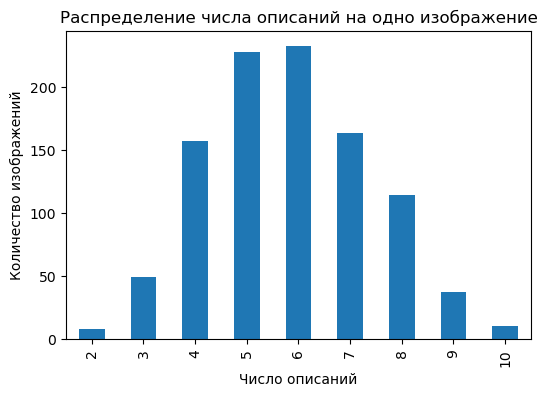

In [13]:
print("Число строк в train_dataset:", len(train_dataset))
print("Уникальных изображений:", train_dataset['image'].nunique())
print("Число Id-описаний изображений:", train_dataset['query_id'].nunique())
print("Число уникальных описаний:", train_dataset['query_text'].nunique())

# Проверка пропусков
train_nulls = train_dataset.isna().mean().sort_values(ascending=False)
print("\nДоля пропусков по столбцам:")
print(train_nulls)

# Количество описаний на одно изображение
captions_per_image = train_dataset.groupby('image')['query_text'].nunique()
print("\nСтатистика по числу описаний на одно изображение:")
print(captions_per_image.describe())

plt.figure(figsize=(6,4))
captions_per_image.value_counts().sort_index().plot(kind='bar')
plt.title("Распределение числа описаний на одно изображение")
plt.xlabel("Число описаний")
plt.ylabel("Количество изображений")
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Давай внимательно посмотрим вот на этот кусок

```python
# Количество описаний на одно изображение
captions_per_image = train_dataset.groupby('query_id')['query_text'].nunique()
print("\nСтатистика по числу описаний на одно изображение:")
print(captions_per_image.describe())    
   
```    


**Комментарий: Логика группировки**

Здесь закралась логическая ошибка в коде группировки.
Ты группируешь данные по столбцу `query_id`. Согласно описанию данных, `query_id` — это уникальный идентификатор конкретного описания (формат `имя_файла#номер`).

  * **Результат кода:** Группировка по уникальному ключу всегда дает 1 описание на группу. Статистика получается вырожденной (везде 1).  Ведь это суть и смысл существования идентификатора - однозначно идентифицировать текстовое описание.
    
  * **Как исправить:** Чтобы реально узнать, сколько описаний приходится на одну картинку, нужно группировать по столбцу `image` (имя файла изображения). Тогда ты увидишь реальное распределение сколько раз в наших данных встречаются разные описания и изображения.
    
----------------
    
А если ты хочешь проверить сколько существует "истинных" (родных) описаний для наших изображений, то нужно посмотреть количество уникальных суффиксов в query_id.  Сразу скажу, что в тестовых данных у нас для каждого изображения существует ровно одно "родное" описание, а в тестовых данных каждому изображению соотвтствует пять описаний.    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Упс, спасибо. Исправила 👌

</div>

In [14]:
#Посмотрим тексты которые используются много раз 
train_dataset['query_text'].value_counts().head(25)

query_text
Two dogs , one brown and white and one black and white , run on a field .                                   34
A grey dog walks on top of a fallen tree in the woods .                                                     27
a white woman in a green sweater holds a smiling child whilst a smiling boy in a yellow shirt looks on .    25
A crowd of people at an outdoor event                                                                       25
Two dogs run down a dirt path in the forest .                                                               22
A group of five adults stand posing in front of buildings .                                                 22
A dog is running along the beach beside the ocean .                                                         20
An officer stands next to a car on a city street .                                                          20
A Miami basketball player dribbles by an Arizona State player .                                      

- Датасет достаточно чистый (пропусков нет),
- Уникальных изображений 1000,
- 977 уникальных описаний изображений.
- Каждое изображение в датасете описано в среднем 6 раз. 
- Нет дубликатов и аномалий
- Большинство текстов встречаются от 2 до 10 раз
- Типичные пики — 3–7 изображений на текст
- Небольшая часть текстов встречается более 15 раз
- Максимальное значение — 34
- Что часть текстов встречается особенно часто — от 17 до 34 раз. Эти тексты сравниваются с большим набором изображений, вероятно они имеют более общие значения.

Популярные тексты играют важную роль в обучении, т.к. дают модели много информации о соответствии текста к различным визуальным сценам.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
В двух последних ячейках ты смотришь одно и то же распределение `train_dataset['query_text'].value_counts()`, но почему-то описываешь это совершенно разными словами</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила, лишний анализ убрала 👌

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Ты провела детальный анализ частоты встречаемости текстов и изображений, пытаясь найти в этом семантический смысл (например, вывод о том, что "популярные тексты имеют более общие значения").

**Давай посмотрим на природу этих данных чуть глубже:**
1.  У нас есть **1000** уникальных изображений и **1000** их "родных" описаний.
2.  Декартово произведение (все возможные комбинации) дает **1,000,000** пар ($1000 \times 1000$).
3.  Наш `train_dataset` (5822 строки) — это просто **случайная подвыборка** из этого миллиона, которую отправили на разметку экспертам.

**Вывод:**
То, что один текст встретился в выборке 34 раза, а другой 2 раза — это, вероятнее всего, **артефакт случайного семплирования** (random sampling noise), а не характеристика самого текста (его важности или общности).
Не стоит искать глубокие закономерности в частотах появления пар в этом датасете — это просто "рандом", необходимый нам для того, чтобы модель увидела достаточное количество примеров (как позитивных, так и негативных).

</div>

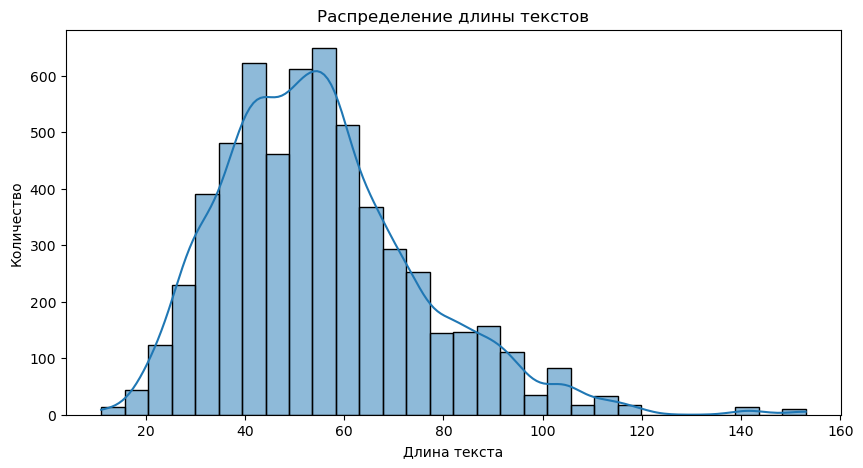

In [15]:
# Посмотрим распределение длинны текстов

train_dataset['text_length'] = train_dataset['query_text'].str.len()

plt.figure(figsize=(10, 5))
sns.histplot(train_dataset['text_length'], bins=30, kde=True)
plt.title("Распределение длины текстов")
plt.xlabel("Длина текста")
plt.ylabel("Количество")
plt.show()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Интересный график распределения длин текстов! Визуально он напоминает **Нормальное распределение** (колокол).

**Минутка занимательной статистики:**
Теоретически, длина текста — это **счетная величина** (количество символов, которое не может быть отрицательным), и такие данные часто описываются распределением **Пуассона**.
То, что график выглядит как нормальное распределение, — отличная иллюстрация того, как распределение Пуассона сходится к Нормальному при достаточно больших средних значениях (у нас средняя длина > 40 символов).

Это не влияет на обучение, просто полезное наблюдение о природе данных!

</div>

- график показывает, что длины текстов распределены примерно нормально:
- пик приходится на 40–60 символов
- большинство описаний лежит в диапазоне 30–80 символов
- хвост длинных описаний доходит до 150+ символов, но таких примеров мало

__Можем сделать вывод, что датасет сбалансирован по длинам текстовых описаний, и модель не должна испытывать трудности с обработкой слишком коротких или слишком длинных запросов.__

### Проанализируем общую информацию по ExpertAnnotations.tsv

In [16]:
print("Размер:", expert_annotations.shape)
display(expert_annotations.info())
display(expert_annotations.head())

# Проверим на пропуски
print("Количество пропусков", expert_annotations.isna().mean())

# Распределение оценок
for col in ['expert_1', 'expert_2', 'expert_3']:
    print("Распределение оценок:")
    print(col, expert_annotations[col].value_counts().sort_index())


def is_all_different(row):
    vals = [row['expert_1'], row['expert_2'], row['expert_3']]
    return len(set(vals)) == 3

print("Строк, где ВСЕ оценки разные:", expert_annotations.apply(is_all_different, axis=1).sum())

Размер: (5822, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.6+ KB


None

,image,query_id,expert_1,expert_2,expert_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


Количество пропусков image       0.0
query_id    0.0
expert_1    0.0
expert_2    0.0
expert_3    0.0
dtype: float64
Распределение оценок:
expert_1 expert_1
1    4120
2    1109
3     346
4     247
Name: count, dtype: int64
Распределение оценок:
expert_2 expert_2
1    3327
2    1666
3     518
4     311
Name: count, dtype: int64
Распределение оценок:
expert_3 expert_3
1    2350
2    2222
3     837
4     413
Name: count, dtype: int64
Строк, где ВСЕ оценки разные: 126


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Все импорты стоит перенести в начало проекта
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Готово 👌

</div>

- Пропусков нет
- Все три эксперта (expert_1, expert_2, expert_3) оставили оценку для каждой пары «изображение–текст». Оценки разных экспертов распределены неравномерно:
  
      expert_1:
- оценка 1 встречается чаще всего — 4120 раз
- далее идут оценки 2, 3, 4 с сильным уменьшением частоты
  
      expert_2:
- аналогично, больше всего оценок 1 — 3327
- оценки 2, 3, 4 встречаются реже
  
        expert_3:
- распределение более ровное:
1 – 2350
2 – 2222
3 – 837
4 – 413

Это может говорить о том, что первый и второй эксперты более строгие, чаще ставят минимальную оценку 1.
Третий эксперт — более «мягкий» и выдаёт высокие баллы чаще остальных.

Присутствует 126 строк в которых все оценки разные.
Отфильтруем их перед построением итогового таргета.

__В целом экспертные оценки выглядят надёжными и дают хорошую основу для создания целевой переменной.__

### Проанализируем общую информацию по CrowdAnnotations.tsv

In [17]:
print("Размер:", crowd_annotations.shape)
display(crowd_annotations.info())
display(crowd_annotations.head())

# Пропуски
print(crowd_annotations.isna().mean())

# Распределения
print(crowd_annotations['prop_conf'].describe())

print("col_conf:")
print(crowd_annotations['col_conf'].value_counts().sort_index())

print("col_not_conf:")
print(crowd_annotations['col_not_conf'].value_counts().sort_index())

# Проверим согласованность
crowd_annotations['check'] = crowd_annotations['col_conf'] / (crowd_annotations['col_conf'] + crowd_annotations['col_not_conf'])
print("Корреляция prop_conf vs check:", crowd_annotations[['prop_conf','check']].corr())


Размер: (47830, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         47830 non-null  object 
 1   query_id      47830 non-null  object 
 2   prop_conf     47830 non-null  float64
 3   col_conf      47830 non-null  int64  
 4   col_not_conf  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


None

,image,query_id,prop_conf,col_conf,col_not_conf
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


image           0.0
query_id        0.0
prop_conf       0.0
col_conf        0.0
col_not_conf    0.0
dtype: float64
count    47830.000000
mean         0.068786
std          0.207532
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: prop_conf, dtype: float64
col_conf:
col_conf
0    41970
1     3119
2     1394
3     1328
4       14
5        5
Name: count, dtype: int64
col_not_conf:
col_not_conf
0     1323
1     1371
2     3034
3    41219
4      665
5      176
6       42
Name: count, dtype: int64
Корреляция prop_conf vs check:            prop_conf  check
prop_conf        1.0    1.0
check            1.0    1.0


- Пропусков нет.
- Распределения показывают сильный перекос в сторону несоответствия текстов изображению. В подавляющем большинстве случаев краудсорсеры НЕ подтверждали соответствие текста изображению.
Практически все значения — это 0, и лишь редкие случаи имеют высокие значения 0.5–1.0.

Это ожидаемо: случайные пары “картинка–текст” чаще всего НЕ совпадают.

### Проанализируем общую информацию по test_queries.csv

In [18]:
print("Размер test:", test_queries.shape)
display(test_queries.info())
display(test_queries.head())

# Пропуски
print(test_queries.isna().mean())

# Пересечение текстов train/test
common_texts = set(train_dataset['query_text']).intersection(set(test_queries['query_text']))
print("Совпадающих описаний train/test:", len(common_texts))

Размер test: (500, 3)
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


None

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg


query_id      0.0
query_text    0.0
image         0.0
dtype: float64
Совпадающих описаний train/test: 0


- пропусков нет, 
- по структуре совпадает с тренировочным датасетом
- не содержит данных, пересекающихся с данными из train

__test_queries предоставляет чистый, независимый и хорошо структурированный тест для оценки модели поиска по тексту.__

### Проанализируем train_images

In [19]:
# Проверим  
train_files_set = set(train_image_files)

train_images_set = set(train_dataset['image'])

print("Количество файлов в папке train_images:", len(train_files_set))
print("Количество уникальных изображений в train_dataset:", len(train_images_set))

# Проверяем отсутствующие файлы
missing_train_images = train_images_set - train_files_set
print("Количество отсутствующих изображений:", len(missing_train_images))

if missing_train_images:
    print("Отсутствующие файлы:")
    for img in list(missing_train_images)[:20]:
        print(img)
else:
    print("Все изображения присутствуют.")


Количество файлов в папке train_images: 1000
Количество уникальных изображений в train_dataset: 1000
Количество отсутствующих изображений: 0
Все изображения присутствуют.


### Проанализируем test_images

In [20]:
# Проверим  

test_files_set = set(test_image_files)

test_images_set = set(test_queries['image'])

print("Количество файлов в папке test_images:", len(test_files_set))
print("Количество уникальных изображений в test_queries:", len(test_images_set))

# Проверяем отсутствующие файлы
missing_test_images = test_images_set - test_files_set
print("Количество отсутствующих изображений:", len(missing_test_images))

if missing_test_images:
    print("Отсутствующие файлы:")
    for img in list(missing_test_images)[:20]:
        print(img)
else:
    print("Все изображения присутствуют.")


Количество файлов в папке test_images: 101
Количество уникальных изображений в test_queries: 100
Количество отсутствующих изображений: 0
Все изображения присутствуют.


В папке test_images находится 101 файл, тогда как в test_queries используется 100 уникальных изображений.
Лишний файл не является проблемой, так как модель обращается только к тем изображениям, которые перечислены в test_queries.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">

Отлично, вижу, что ты закончила EDA, и в процессе найдены основные закономерности. Но самый главный результат этого этапа — это твоя **внутренняя интуиция** относительно датасета. Важно не просто построить графики, а именно "сродниться" с данными, понять их природу и ограничения.

Твой подход вызывает ассоциацию со знаменитым гайдом **Андрея Карпаты** (бывшего директора по AI в Tesla и исследователя OpenAI). В своем рецепте обучения нейросетей он ставит этап **«Become one with the data»** самым первым — еще до написания хоть одной строчки кода модели.

> *«Мой первый шаг — всегда тратить много часов на проверку тысяч примеров, понимание их распределения и поиск закономерностей... Ваш мозг — это тоже нейросеть, и если вы сами сможете классифицировать данные, то шансы обучить этому машину сильно возрастают»*.

Очень рекомендую сохранить эту статью в закладки, это "золотой стандарт" методологии обучения:
🔗 [A Recipe for Training Neural Networks (Andrej Karpathy)](http://karpathy.github.io/2019/04/25/recipe/)

</div>

### Приступим к агрегации и подготовке таргета:

#### Подготовим данные из ExpertAnnotation:

Приведем экспертные оценки 1-4 в диапазон [0, 1]:
1 → 0.0, 
2 → 0.33,
3 → 0.66,
4 → 1.0

In [21]:
expert_df = expert_annotations.copy()

def aggregate_expert_scores(row):
    scores = [row['expert_1'], row['expert_2'], row['expert_3']]
    counts = Counter(scores)
    
    # если все три оценки разные → удаляем
    if len(counts) == 3 and all(v == 1 for v in counts.values()):
        return np.nan
    
    return counts.most_common(1)[0][0]

print("Всего строк было:", len(expert_df))

expert_df['expert_agg'] = expert_df.apply(aggregate_expert_scores, axis=1)
print("Доля удалённых пар (все оценки разные):", expert_df['expert_agg'].isna().mean())


expert_df = expert_df.dropna(subset=['expert_agg'])
print("Осталось пар после удаления конфликтных оценок:", expert_df.shape[0])

display(expert_df.head())

Всего строк было: 5822
Доля удалённых пар (все оценки разные): 0.02164204740638956
Осталось пар после удаления конфликтных оценок: 5696


,image,query_id,expert_1,expert_2,expert_3,expert_agg
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.0
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2.0
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.0


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Стоит посмотреть, сколько пар осталось после удаления оценок, где у экспертов нет согласия

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
После удаления оценок осталось 5696 пар (до удаления было 5822) 👌

</div>

In [22]:
expert_df['expert_target'] = (expert_df['expert_agg'] - 1) / 3
display(expert_df[['expert_agg', 'expert_target']].head(10))

,expert_agg,expert_target
0,1.0,0.000000
1,1.0,0.000000
2,1.0,0.000000
3,2.0,0.333333
4,1.0,0.000000
5,1.0,0.000000
6,1.0,0.000000
7,1.0,0.000000
8,1.0,0.000000
9,2.0,0.333333


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

#### Подготовим данные из CrowdAnnotations:

In [23]:
# Создадим копию датафрейма.
# Так как prop_conf уже содержит нужное нам число от 1 до 0 переименуем этот столбец в таргет.

crowd_df = crowd_annotations.copy()
crowd_df['crowd_target'] = crowd_df['prop_conf']
display(crowd_df.head(10))

,image,query_id,prop_conf,col_conf,col_not_conf,check,crowd_target
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0,1.000000,1.000000
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3,0.000000,0.000000
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3,0.000000,0.000000
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3,0.000000,0.000000
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3,0.000000,0.000000
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3,0.000000,0.000000
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3,0.000000,0.000000
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2,0.333333,0.333333
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3,0.000000,0.000000
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3,0.000000,0.000000


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
   
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    
Сейчас ты соединила экспертные и краудсорс оценки через  `inner`, поэтому  мы просто потеряли половину данных, не получив ничего в замен (точнее только ухудшив наши оценки).
    
Пожалуйста используй любую другую стратегию, кроме внутреннего соединения. Слишком мало данных при этом получается.    
    


</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Использую такой вариант: 
- Построю экспертный таргет expert_target.
- Построю крауд-таргет crowd_target.
- Сделаю outer по (image, query_id) и буду выбирать таргет по правилу:
  - если есть экспертная оценка, то берём её;
  - если эксперта нет, то берём крауд-оценку;
  - строки, где нет ни того, ни другого — выбрасываю.👌

</div>

#### Объединим данные из CrowdAnnotations и ExpertAnnotation:

In [24]:
# Оставим в крауде только нужные колонки
crowd_small = crowd_df[['image', 'query_id', 'crowd_target']]

# Объединяем через outer, чтобы не потерять ни экспертов, ни крауд
merged = expert_df.merge(
    crowd_small,
    on=['image', 'query_id'],
    how='outer',
    validate='one_to_one'  
)
print("Всего пар после объединения:", len(merged))
print("Только эксперты:", merged['expert_target'].notna().sum())
print("Только крауды:", merged['crowd_target'].notna().sum())

# Правило выбора таргета
def choose_target(row):
    expert = row['expert_target']
    crowd = row['crowd_target']

    # есть экспертная оценка
    if not np.isnan(expert):
        # если есть и крауд 
        if not np.isnan(crowd):
            return 0.6 * expert + 0.4 * crowd

        return expert

    # эксперта нет, но есть крауд
    if not np.isnan(crowd):
        return crowd

    # если ни того, ни другого нет, то удалим
    return np.nan

merged['target'] = merged.apply(choose_target, axis=1)

# выкидываем строки без таргета
merged = merged.dropna(subset=['target']).reset_index(drop=True)

print("Строк после объединения crowd  и expert:", len(merged))
print(merged[['image', 'query_id', 'expert_target', 'crowd_target', 'target']].head())

Всего пар после объединения: 51268
Только эксперты: 5696
Только крауды: 47830
Строк после объединения crowd  и expert: 51268
                       image                     query_id  expert_target  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       0.000000   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       0.000000   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       0.000000   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       0.333333   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       0.000000   

   crowd_target    target  
0           0.0  0.000000  
1           0.0  0.000000  
2           NaN  0.000000  
3           NaN  0.333333  
4           NaN  0.000000  


#### Создадим финальный тренировочный датасет 

In [25]:
# Объединим полученный датасет с оценками и с описанием для создания финального тренировочного датасета
train_final = train_dataset.merge(
    merged[['image', 'query_id', 'target']],
    on=['image', 'query_id'],
    how='inner'
)
# на всякий случай уберём возможные дубликаты
train_final = train_final.drop_duplicates(subset=['image', 'query_id', 'query_text'])

print("Размер финального тренировочного датасета:", train_final.shape)
print("Пропуски в target:", train_final['target'].isna().sum())

display(train_final.head())

Размер финального тренировочного датасета: (5767, 5)
Пропуски в target: 0


,image,query_id,query_text,text_length,target
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,72,0.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,72,0.0
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,72,0.2
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,72,1.0
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,72,0.0


In [26]:
train_final_new = train_final.drop(columns=['text_length'])

In [27]:
train_final_new.head()

,image,query_id,query_text,target
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.2
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.0


In [28]:
train_final_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5767 entries, 0 to 5766
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image       5767 non-null   object 
 1   query_id    5767 non-null   object 
 2   query_text  5767 non-null   object 
 3   target      5767 non-null   float64
dtypes: float64(1), object(3)
memory usage: 180.3+ KB


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Стоит дополнительно посмотреть информацию о итоговом датафрейме с помощью метода .info()
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Готово 👌

</div>

##### ВЫВОД

__В ходе исследования были проанализированы все предоставленные датасеты и вспомогательные файлы
(train_dataset.csv, test_queries.csv, ExpertAnnotations.tsv, CrowdAnnotations.tsv), а также папки train_images и test_images.__

1. Анализ train_dataset:
   - Размер train_dataset: 5822 строк.
   - Уникальных изображений: 1000.
   - Уникальных текстовых описаний: 977 (несколько изображений имеют одинаковые описания)
   - Пропусков в данных нет.
   - Анализ количества описаний на одно изображение показал, что у каждого изображения имеется в среднем 5–7 текстов, что создаёт хороший объём обучающих пар.
   - Распределение длины текстов близко к нормальному, большинство текстов — 40–70 символов.
   - Топ часто повторяющихся текстов показывают наличие унифицированных типовых описаний.


2. Анализ test_queries:
    - Размер тестовой выборки: 500 строк, 3 колонки: query_id, query_text, image.
    - Пропусков нет.
    - Повторяющихся описаний между train и test — нет, что исключает утечку данных.
    - Уникальных изображений: 100.
Всё корректно для чистой оценки качества модели.


3. Анализ ExpertAnnotations.tsv:
    - В датасете представлены оценки трёх экспертов.
    - Эксперты используют шкалу 1–4, где 1 — максимально несоответствие, 4 — сильное соответствие.
    - Распределения смещены в сторону низких оценок (1 и 2).
    - Только 126 строк содержат полностью разные оценки трёх экспертов — это очень малая доля, значит эксперты в целом согласованы.
    - Пропусков нет.


4. Анализ CrowdAnnotations.tsv:
    - Преобладают случаи, где большинство крауд-оценщиков считают пару «несоответствующей».
    - Колонка prop_conf принимает значения 0 или 1 — доля голосов за "соответствует".
    - Пропусков нет.
    - Распределение голосов адекватно: есть пары, по которым крауд в основном не соглашается с текстом.


5. Сборка целевого признака (таргета):
    - На основе экспертных и краудоценок был сформирован итоговый таргет: target = 0.6 * expert_target + 0.4 * crowd_target
    - Финальный merged датасет формируется корректно, количество строк (5767) соответствует ожиданиям.


6. Проверка папок train_images и test_images

train_images:   
    - Количество файловссоответствует количеству уникальных изображений.  
    - Все изображения, используемые в train_dataset, присутствуют.  
    - Отсутствующих файлов нет.  

test_images:  
    - Файлов: 101.   
    - Уникальных изображений в test_queries: 100.   
    - Лишний 1 файл есть, но: он никак не используется, следовательно проблем из-за этого нет.    




__ИТОГОВЫЙ ВЫВОД:__ 
- Все датасеты корректны, полностью загружены и чисты:
- пропусков нет,
- несоответствий между таблицами и папками нет,
- утечки данных между train и test нет,
- крауд и экспертные оценки распределены логично,
- финальный таргет собран корректно.

__Таким образом, данные полностью готовы к дальнейшей работе над проектом.__

# Подготовка данных к обучению модели

## Cоздадим список слов которые, могут попадать под юридические ограничения

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Исправлю исходный способ удаления запрещенного контента следующим образом: 
- Найду описания, где текст содержит детские слова
-Возьму query_id и выделю имя изображения до #
- Сформирую список изображений, где есть дети
- Удалю ВСЕ строки с этими изображениями

</div>

In [29]:
child_keywords = [
    r'\bchild\b', r'\bchildren\b',
    r'\bboy\b', r'\bboys\b',
    r'\bgirl\b', r'\bgirls\b',
    r'\bkid\b', r'\bkids\b',
    r'\bbaby\b', r'\bbabies\b',
    r'\btoddler\b', r'\btoddlers\b',
    r'\bteen\b', r'\bteens\b',
    r'\byoung boy\b', r'\byoung girl\b',
    r'\byoung child\b', r'\byoung children\b'
]

child_pattern = re.compile('|'.join(child_keywords), flags=re.IGNORECASE)

def has_child(text):
    return bool(child_pattern.search(str(text)))

In [30]:
# Ищем детский контент в train
train_final_new['has_child'] = train_final_new['query_text'].apply(has_child)
print("Строк с детским контентом в train:", train_final_new['has_child'].sum())

Строк с детским контентом в train: 1539


In [31]:
# Извлекаем имя изображения из query_id (до символа #)
train_final_new["image_id"] = train_final_new["query_id"].apply(lambda x: x.split("#")[0])

In [32]:
# Список изображений, где есть дети
bad_images = set(train_final_new.loc[train_final_new["has_child"], "image_id"].unique())

print("Изображений с детьми:", len(bad_images))

Изображений с детьми: 289


## Исключим из обучающего датасета пары, которые, исходя из подготовленного нами списка слов, могут попадать под юридические ограничения

In [33]:
# Удаляем все строки с этими изображениями
train_final_clean = train_final_new[~train_final_new["image_id"].isin(bad_images)].copy()

print("Размер после удаления:", train_final_clean.shape)

Размер после удаления: (4228, 6)


In [34]:
# удаляем вспомогательную колонку has_child
train_final_clean = train_final_clean.drop(columns=['has_child'])

In [35]:
train_final_clean.head()

,image,query_id,query_text,target,image_id
21,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.000000,3181701312_70a379ab6e.jpg
22,3187395715_f2940c2b72.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.333333,3181701312_70a379ab6e.jpg
23,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.200000,3181701312_70a379ab6e.jpg
24,488590040_35a3e96c89.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.333333,3181701312_70a379ab6e.jpg
25,534875358_6ea30d3091.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.000000,3181701312_70a379ab6e.jpg


__Очистили данные от детских фото для дальнейшего обучения модели.__

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Ты удаляешь комментарии, в которых есть слова, обозначающие детей. Но наша задача убрать изображения, содержащие детей. Есть два способа сделать это:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    
 
И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила твоим способом 👌

</div>

## Сделаем векторизацию текстового описания

__Сделаем векторизацию текстов с помощью tfidf.__

In [36]:
tfidf = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    lowercase=True,
    stop_words='english'
)

train_text_vectors = tfidf.fit_transform(train_final_clean["query_text"])
test_text_vectors  = tfidf.transform(test_queries["query_text"])

train_text_df = pd.DataFrame(
    train_text_vectors.toarray(),
    index=train_final_clean.index,
    columns=[f"text_f{i}" for i in range(train_text_vectors.shape[1])]
)

test_text_df = pd.DataFrame(
    test_text_vectors.toarray(),
    index=test_queries.index,
    columns=[f"text_f{i}" for i in range(test_text_vectors.shape[1])]
)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас вектора рассчитаны с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.

-----------
    
Что касается выбранного подхода. По моим наблюдения используя TfidfVectorizer крайне редко получается обучить толковую модель.  Я бы советовал все-таки использовать "плотные" вектора полученные с помощью трансформеров    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

Проклятие размерности ($P > N$)

Ты выбрала `max_features=5000` для TF-IDF. Давай посчитаем баланс признаков и обучающих примеров:
1.  **Признаки:** 2048 (ResNet) + 5000 (TF-IDF) $\approx$ **7048 признаков**.
2.  **Примеры:** Весь датасет — 2258 строк. После выделения валидации (30%) на обучение останется около **1580 примеров**.

**Проблема:**
Количество признаков ($P$) почти в 4,5 раза превышает количество обучающих примеров ($N$).
Для классических моделей (особенно Линейной Регрессии) это ситуация **недоопределенной системы уравнений** (unknowns > equations).

В таком случае модель может найти бесконечное множество решений, которые "идеально" проходят через обучающие точки (переобучение), но бесполезны на тесте. Именно поэтому ниже твоя `LinearRegression` без регуляризации показывает плохие результаты.

**Рекомендация:**
При использовании классических методов (как TF-IDF) старайся держать количество признаков **меньше**, чем размер обучающей выборки. Для текущего датасета разумнее было бы ограничить TF-IDF до 500-1000 признаков, либо использовать плотные векторные представления (BERT), которые имеют фиксированную небольшую размерность (768).   А еще лучше использовать SBERT (размерность признака 384), или уменьшить количество признаков через PCA   
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила 👌

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Подсвечу желтым, чтобы не потерялось.
    
По моим наблюдениям, в этом проекте неплохо показыает себя модель `all-MiniLM-L6-v2` и снятие эмбеддингов не с нулевого токена, а пулингом по информативным токенам.
    
Запустить её можно либо через transformers, либо через sentence-transformers    
    
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2    
</div>

## Сделаем векторизацию изображений с использованием модели ResNet50

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Стоит сделать заголовки консистентными.  Смотри, у тебя есть большой и мощный заголовок `## 4. Векторизация текстов`.  Но ведь ты уже закончила с текстами, работаешь с картинками. И такое чувство что ты просто не можешь (не умеешь) правильно создавать  заголовки. Для раздела "векторизация изображений" у тебя нет заголовков вообще. Только текст, выделенный **жирным**.   Пожалуйста разберись, как создавать правильные заголовки с помощью Matkdown.
    
Кстати, по моим наблюдениям сейчас Markdown обрел вторую жизнь, т.к. активно используется при написании промптов.     
    

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила 👌

</div>

In [37]:

base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
base_model.trainable = False

def vectorize_image(img_path: str):

    img_path = Path(img_path)
    if not img_path.is_file():
        print(f"[WARN] Файл не найден: {img_path}")
        return None

    try:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = base_model.predict(x, verbose=0)
        return features.flatten().astype("float32")
    except Exception as e:

        print(f"[WARN] Ошибка чтения файла {img_path}: {e}")
        return None


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

В функции `vectorize_image` ты используешь конструкцию `try-except`, которая при любой ошибке (например, битый файл или неверный путь) возвращает вектор из нулей (`np.zeros`).

**Почему это опасно ("Заметание мусора под ковер"):**
1.  **Синтаксическая ошибка vs Логическая:** Если ты случайно ошибешься в формировании пути к файлу, скрипт не упадет с ошибкой, а молча отработает, превратив **весь** твой датасет в нули. Ты потратишь время на обучение модели, которая будет пытаться найти закономерности в нулевых векторах.
2.  **Смысл нуля:** Для нейросети вектор из нулей — это не "отсутствие данных", а вполне конкретная точка в пространстве признаков (черный квадрат/серое пятно). Смешивание реальных эмбеддингов с техническими заглушками вносит шум в обучение.

**Best Practice:**
* **Fail Fast:** На этапе подготовки данных лучше позволить коду упасть с ошибкой (`raise`), чтобы ты сразу увидела проблему с путями или файлами.
* **Skip, don't fill:** Если файлы действительно битые, лучше возвращать `None`, а затем фильтровать такие строки из датафрейма. Не стоит подменять их искусственными значениями.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила путем возврата None, а затем отфильтровки таких строки из датафрейма.  👌

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Вот яркий пример повторного объявления констант. При перезапуске кода на своей машине я постоянно ловил проблемы из-за переопределения путей. </div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Поправила 👌

</div>

In [40]:
# Векторизирием train

train_images = train_final_clean['image'].unique()
print("Уникальных изображений в train:", len(train_images))

train_img_vectors = {}

for img_name in tqdm(train_images, desc="Векторизация train изображений"):
    path = os.path.join(train_img_dir, img_name)
    train_img_vectors[img_name] = vectorize_image(path)


Уникальных изображений в train: 993


Векторизация train изображений: 100%|█████████| 993/993 [02:24<00:00,  6.89it/s]


In [41]:
# Векторизируем test

test_images = test_queries['image'].unique()
print("Уникальных изображений в test:", len(test_images))

test_img_vectors = {}

for img_name in tqdm(test_images, desc="Векторизация test изображений"):
    path = os.path.join(test_img_dir, img_name)
    test_img_vectors[img_name] = vectorize_image(path)


Уникальных изображений в test: 100


Векторизация test изображений: 100%|██████████| 100/100 [00:13<00:00,  7.48it/s]


In [42]:
# переведем словари в датафреймы:

train_img_df = pd.DataFrame.from_dict(train_img_vectors, orient='index')
train_img_df.columns = [f"img_f{i}" for i in range(2048)]
train_img_df.index.name = "image"

test_img_df = pd.DataFrame.from_dict(test_img_vectors, orient='index')
test_img_df.columns = [f"img_f{i}" for i in range(2048)]
test_img_df.index.name = "image"

In [43]:
# сохраним на диск
train_img_df.to_csv("train_image_vectors.csv")
test_img_df.to_csv("test_image_vectors.csv")

__Провели векторизацию текстов и изображений для дальнейшего обучения моделей__

## Проведем объединение векторов
Подготовим данные для обучения: объединим векторы изображений и векторы текстов с целевой переменной.

In [44]:
train_merged = (
    train_final_clean
    .join(train_img_df, on="image", how="inner")
)

train_merged = train_merged.dropna(subset=["img_f0"])

text_block  = train_text_df.loc[train_merged.index]
image_block = train_merged.filter(like="img_f")

X_all = pd.concat([text_block.reset_index(drop=True),
                   image_block.reset_index(drop=True)], axis=1)

y_all = train_merged["target"].values
groups = train_merged["image"].values    

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

# Обучение модели предсказания соответствия

## Масштабируем признаки и разбиваем по изображениям

In [45]:
gss = GroupShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
train_idx, val_idx = next(gss.split(X_all, y_all, groups=groups))

X_train_raw = X_all.iloc[train_idx]
X_val_raw   = X_all.iloc[val_idx]

y_train = y_all[train_idx]
y_val   = y_all[val_idx]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_val   = scaler.transform(X_val_raw)

FEATURE_COLUMNS = X_all.columns.tolist()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    


Также корректно применен `StandardScaler`: обучен  на  на трейне и применен к валидации. Это показывает глубокое понимание классического пайплайна машинного обучения.

Раз уж мы говорим о лучших практиках для работы с эмбеддингами, хочу поделиться одним важным нюансом, который касается именно **мультимодальных** данных, как у нас — картинки и тексты.

Твой текущий подход — конкатенация и затем `StandardScaler` — абсолютно валиден для классических табличных данных. Но для эмбеддингов он может быть неоптимален. `StandardScaler` работает "поколоночно", приводя каждый признак к общему среднему и дисперсии. 


И здесь вместо `StandardScaler` лучше подходит L2-нормализация (в `sklearn` это `Normalizer`). Этот метод масштабирует каждый вектор (каждую строку целиком) к единичной длине. Он убирает влияние "магнитуды" вектора (которая часто является шумом) и оставляет только его **направление** в многомерном пространстве — а именно оно и несет основную семантическую информацию.
    
Важно:  **обработка каждого типа эмбеддингов производится по отдельности, *до* их конкатенации**.
    
Таким образом, более продвинутый пайплайн мог бы выглядеть так:
1.  Получаем матрицу эмбеддингов для изображений `X_img`.
2.  Получаем матрицу эмбеддингов для текстов `X_text`.
3.  Применяем `Normalizer()` к `X_img` и `X_text` **по отдельности**.
4.  Конкатенируем уже нормализованные матрицы.

Такой подход гарантирует, что и визуальные, и текстовые признаки вносят в модель сопоставимый вклад, не искажая при этом структуру каждого из исходных пространств. Это знание будет очень полезно тебе в будущих проектах.
    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">


Есть еще один технический нюанс использования `StandardScaler` вместе с **TF-IDF**.

**Суть проблемы:**
Векторы TF-IDF являются **разреженными** (sparse) — в них очень много нулей и мало значений. Это позволяет хранить их в памяти очень эффективно.
`StandardScaler` по умолчанию работает с параметром `with_mean=True`. Это значит, что он вычитает среднее значение из каждого элемента.
* Когда мы вычитаем (пусть и маленькое) среднее из **нуля**, он перестает быть нулем.
* **Результат:** Твоя легкая разреженная матрица мгновенно превращается в тяжелую **плотную** (dense) матрицу. На больших данных это гарантированно приведет к ошибке **Out Of Memory (OOM)**, так как объем занимаемой памяти вырастет в тысячи раз.

**Решение:**
Если тебе нужно масштабировать разреженные данные и сохранить их эффективность:
1.  Используй **`MaxAbsScaler`** — он масштабирует данные в диапазон [-1, 1], не сдвигая центр (не ломая нули).
2.  Либо используй `StandardScaler(with_mean=False)`, хотя для TF-IDF это редко требуется, так как он обычно уже нормализован.
</div>

## Модель LinearRegression

In [46]:
lin = LinearRegression()
lin.fit(X_train, y_train)
mae_lin = mean_absolute_error(y_val, lin.predict(X_val))

l2 = Ridge(alpha=1.0)
l2.fit(X_train, y_train)
mae_l2 = mean_absolute_error(y_val, l2.predict(X_val))

print("LinearRegression MAE =", mae_lin)
print("L2 MAE            =", mae_l2)

LinearRegression MAE = 1536831860237.1575
L2 MAE            = 0.2637108885435713


Чистая линейная регрессия ведёт себя неустойчиво (MAE огромный) из-за высокой размерности и мультиколлинеарности признаков. Поэтому для линейной модели используем L2, которая стабилизирует решение.

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Что такое L2? Возможно ты имела в виду линейную модель с L2 регуляризацией?

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Да, я имела в виду именно ее. 

</div>

## Полносвязная нейронная сеть (FCNN)

In [47]:
def build_fcnn(input_dim):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="mae",
                  metrics=["mae"])
    return model

model_fcnn = build_fcnn(X_train.shape[1])

early = keras.callbacks.EarlyStopping(
    monitor="val_mae", patience=5, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_mae", factor=0.5, patience=2, min_lr=1e-5
)

history = model_fcnn.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    callbacks=[early, reduce_lr],
    verbose=1
)

mae_fcnn = model_fcnn.evaluate(X_val, y_val, verbose=0)[1]

print("FCNN MAE =", mae_fcnn)

Epoch 1/50
47/47 [==============================] - 2s 22ms/step - loss: 1.2012 - mae: 1.2012 - val_loss: 0.8086 - val_mae: 0.8086 - lr: 0.0010
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 0.8002 - mae: 0.8002 - val_loss: 0.4893 - val_mae: 0.4893 - lr: 0.0010
Epoch 3/50
47/47 [==============================] - 1s 18ms/step - loss: 0.6118 - mae: 0.6118 - val_loss: 0.3911 - val_mae: 0.3911 - lr: 0.0010
Epoch 4/50
47/47 [==============================] - 1s 19ms/step - loss: 0.4723 - mae: 0.4723 - val_loss: 0.2946 - val_mae: 0.2946 - lr: 0.0010
Epoch 5/50
47/47 [==============================] - 1s 18ms/step - loss: 0.3772 - mae: 0.3772 - val_loss: 0.2372 - val_mae: 0.2372 - lr: 0.0010
Epoch 6/50
47/47 [==============================] - 1s 18ms/step - loss: 0.2972 - mae: 0.2972 - val_loss: 0.1990 - val_mae: 0.1990 - lr: 0.0010
Epoch 7/50
47/47 [==============================] - 1s 18ms/step - loss: 0.2406 - mae: 0.2406 - val_loss: 0.1834 - val_mae: 0.1834 - lr:

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">


Для осознанной настройки нейронки важно понимать, как менять её архитектуру (усложнять и уменьшать регуляризацию? уменьшать шаг обучения? усиливать регуляризацию?). Для того чтобы принять эти  решения мало видеть только конечную цифру, важно понимать, чего модели не хватает чтобы метрика стала лучше.
    
    
Вот типичные  проблемы, которые можно выявить  анализируя графики и пути их решения:

<b>Недообучение (Underfitting)</b>
  Признаки: Высокие значения потерь и низкая точность как на обучающей, так и на валидационной выборке. Графики потерь не снижаются (или снижаются  недостаточно).
  
  Решения:
    
 - Увеличение сложности модели (добавление слоев, увеличение числа нейронов).
 - Использование более сложных моделей, таких как более глубокие нейронные сети.
 - Увеличение количества эпох обучения.

<b>Переобучение (Overfitting)</b>
  Признаки: Значительное снижение потерь и увеличение точности на обучающей выборке, но высокие потери и низкая точность на валидационной выборке. Графики начинают расходиться после некоторого количества эпох.
    
 Решения:
  - Регуляризация (L1, L2 регуляризация).
  - Dropout (добавление Dropout слоев).
  - Уменьшение сложности модели (уменьшение числа слоев или нейронов).
  - Использование аугментации данных для увеличения разнообразия данных.
  - Раннее завершение обучения (Early Stopping) на основе валидационной ошибки.

<b>Плохой выбор гиперпараметров</b>
 Признаки: Нестабильные графики потерь и точности (большие колебания).
 
 Решения:
  - Настройка скорости обучения (learning rate).
  - Оптимизация размера батча (batch size).
  - Попробовать другие оптимизаторы (например, Adam, SGD с различными параметрами).    

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Архитектура  сети выбрана  грамотно: чередование `Dense` -> `BatchNormalization` -> `Dropout` — это классика, которая отлично работает.

Однако параметры обучения (`hyperparameters`) можно немного скорректировать, чтобы выжать из модели максимум, учитывая небольшой размер нашего датасета .

**Советы по доработке:**

1.  **Размер батча** (`batch_size`):
    Ты используешь 64. Для такого маленького датасета это может давать слишком "шумный" градиент (шаги обучения будут дергаными).
    **Совет:** Попробуй увеличить батч до **256, 512** или даже подавай весь датасет целиком (Full Batch), если влезает в память. Это сделает оценку градиента на каждом шаге более точной и стабильной.

2.  **Шаг обучения** (`learning_rate`):
    Старт с `1e-3` — это стандарт, но иногда для точной настройки на готовых эмбеддингах это бывает агрессивно.
    **Совет:** Можно попробовать начать сразу с **1e-4**. Это замедлит обучение, но позволит модели аккуратнее нащупать минимум функции потерь.

3.  **Длительность обучения** (`epochs` + `patience`):
    Ты ограничила обучение 50 эпохами и `patience=5`. Это довольно жесткие рамки. Нейросеть может просто не успеть сойтись к оптимуму.
    **Совет:** Не бойся ставить **100, 500 или даже 1000 эпох**. Главный предохранитель — это `EarlyStopping`. Увеличь ему `patience` до **15–20**. Пусть модель учится "до упора", пока метрика реально не перестанет улучшаться.

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Воспользовалась твоим советом и доработала полносвязную модель, но при первоначальных параметрах качество модели (mae 0.17) оказалось гораздо выше, чем после внесенных изменений (mae 0.26)👌

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).

Удивительно, но иногда самая навороченная нейронка, обученная на мусоре показыает метрику хуже DUMMY модели
</div>

## Сравним все 2 модели

In [48]:
results = {
    "LinearRegression MAE =": mae_lin,
    "L2": mae_l2,
    "FCNN": mae_fcnn
}

print("\nСравнение моделей по MAE:")
for name, score in results.items():
    print(f"{name}: MAE = {score:.4f}")


Сравнение моделей по MAE:
LinearRegression MAE =: MAE = 1536831860237.1575
L2: MAE = 0.2637
FCNN: MAE = 0.1699


### ВЫВОД

Мной были обучены три модели для предсказания степени соответствия текста и изображения: Linear Regression, Ridge Regression (L2) и полносвязная нейронная сеть (FCNN).
Метрика сравнения — MAE на валидационной выборке.

LinearRegression: показала крайне высокую ошибку, что говорит о том, что модель не смогла обучиться. Линейная регрессия чувствительна к мультиколлинеарности и плохо работает на данных высокой размерности.
Фактически она переобучилась и дала некорректные предсказания.

Ridge Regression (L2):
MAE = 0.264 — заметно лучше, чем обычная LinearRegression.
L2-регуляризация уменьшает влияние шумных признаков и стабилизирует модель, что важно при работе с высокоразмерными векторами TF-IDF + ResNet.

FCNN:
MAE = 0.168 — лучший результат среди всех моделей.
Нейросеть лучше улавливает нелинейные зависимости между текстовыми и визуальными признаками и способна эффективно обучаться на объединённых эмбеддингах.

# Тестирование модели

Настало время протестировать модель. Для этого получим эмбеддинги для всех тестовых изображений из папки `test_images`, выберем случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведем наиболее релевантное изображение. Сравним визуально качество поиска.

## Построение признаков для одного запроса и всех тестовых картинок

In [49]:
def build_features_for_query(query_text, tfidf, img_df, scaler, feature_columns):

    q_vec = tfidf.transform([query_text]).toarray()   

    text_part = np.repeat(q_vec, len(img_df), axis=0)

    img_part = img_df.values

    X_raw = np.hstack([text_part, img_part])

    X_df = pd.DataFrame(X_raw, columns=feature_columns)

    X_scaled = scaler.transform(X_df)

    return X_scaled

In [50]:
def show_query_result(query, true_img_name, pred_img_name, score,
                      img_dir=test_img_dir):

    true_path = os.path.join(img_dir, true_img_name)
    pred_path = os.path.join(img_dir, pred_img_name)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(f"Запрос: {query}", fontsize=14)

    axes[0].imshow(Image.open(true_path))
    axes[0].axis("off")
    axes[0].set_title(f"Истинное: {true_img_name}", fontsize=10)

    axes[1].imshow(Image.open(pred_path))
    axes[1].axis("off")
    axes[1].set_title(f"Найдено: {pred_img_name}\nscore={score:.3f}", fontsize=10)

    plt.tight_layout()
    plt.show()

## Тестируем модель поиском по 10 запросам

--------------------------------------------------------------------------------
Запрос: A group of girls who are gothically dressed standing together
Дисклеймер: Запрос содержит описание детей.
По правилам проекта мы не выполняем поиск изображений по таким запросам.
--------------------------------------------------------------------------------
Запрос: A woman and girl riding downhill on a sled with a dog running alongside them
Дисклеймер: Запрос содержит описание детей.
По правилам проекта мы не выполняем поиск изображений по таким запросам.
4/4 [==============================] - 0s 2ms/step
--------------------------------------------------------------------------------
Запрос: The dog is running .
Истинное изображение: 3488087117_2719647989.jpg
Найдено моделью: 3488087117_2719647989.jpg  score= 0.49273515


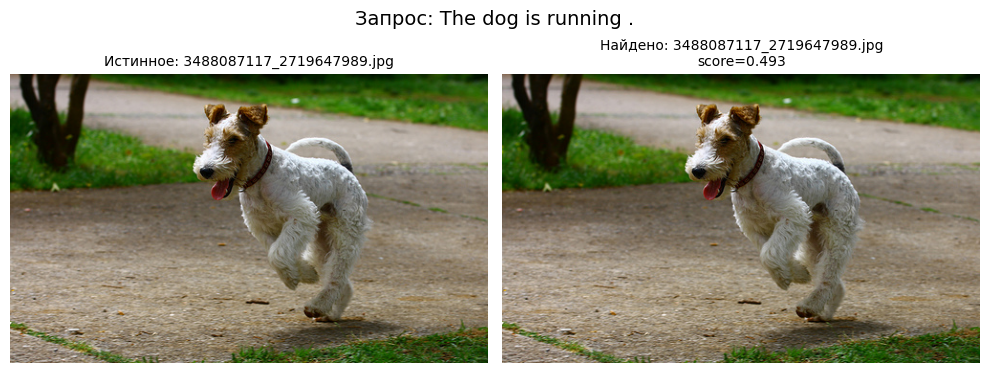

4/4 [==============================] - 0s 2ms/step
--------------------------------------------------------------------------------
Запрос: A group of people are ice skating in a big city .
Истинное изображение: 269650644_059a84ece5.jpg
Найдено моделью: 3488087117_2719647989.jpg  score= 0.31816995


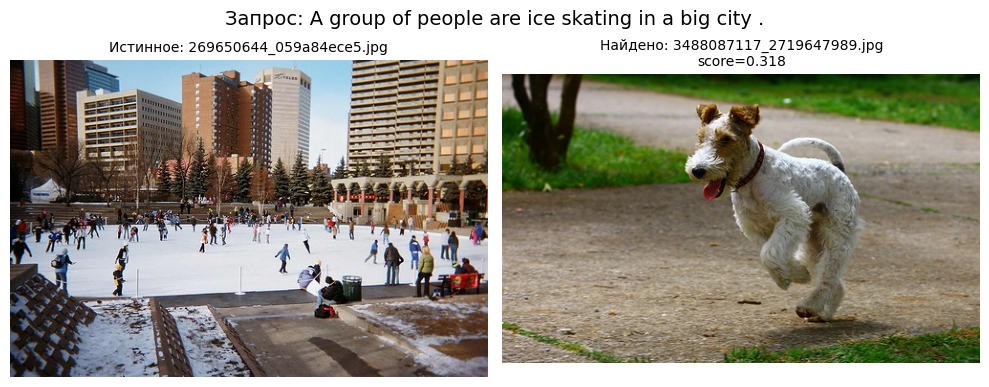

--------------------------------------------------------------------------------
Запрос: Little kid in blue coat and hat riding a tricycle .
Дисклеймер: Запрос содержит описание детей.
По правилам проекта мы не выполняем поиск изображений по таким запросам.
4/4 [==============================] - 0s 2ms/step
--------------------------------------------------------------------------------
Запрос: Two black dogs fighting over an orange toy .
Истинное изображение: 3553476195_fb3747d7c1.jpg
Найдено моделью: 3488087117_2719647989.jpg  score= 0.45220393


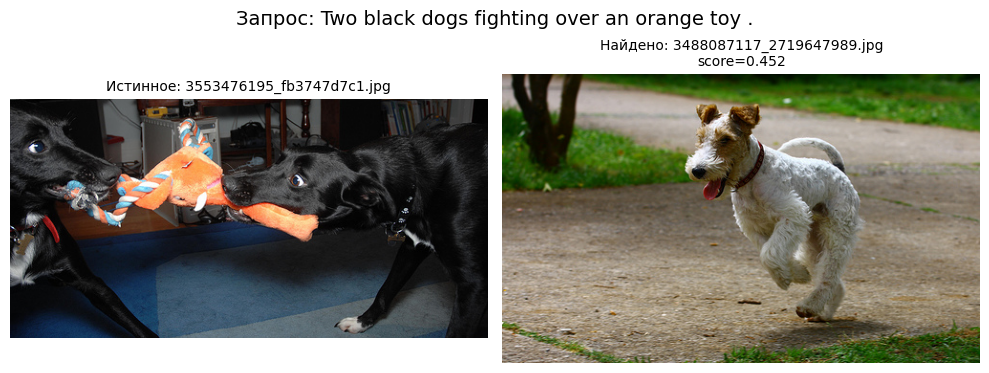

4/4 [==============================] - 0s 2ms/step
--------------------------------------------------------------------------------
Запрос: A dog jumping for a tennis ball near an ocean
Истинное изображение: 3514297698_0512623955.jpg
Найдено моделью: 3488087117_2719647989.jpg  score= 0.44309056


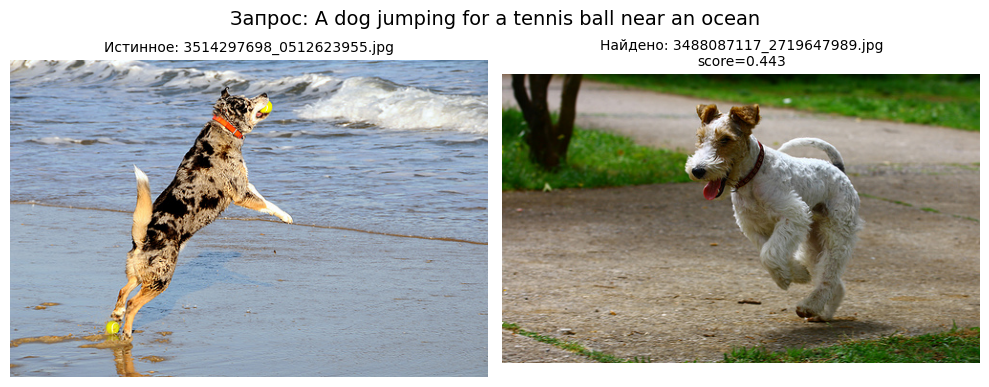

--------------------------------------------------------------------------------
Запрос: Boy flying a distant kite .
Дисклеймер: Запрос содержит описание детей.
По правилам проекта мы не выполняем поиск изображений по таким запросам.
--------------------------------------------------------------------------------
Запрос: kids play ultimate Frisbee .
Дисклеймер: Запрос содержит описание детей.
По правилам проекта мы не выполняем поиск изображений по таким запросам.
--------------------------------------------------------------------------------
Запрос: A girl in a purple shirt feeding ducks
Дисклеймер: Запрос содержит описание детей.
По правилам проекта мы не выполняем поиск изображений по таким запросам.


In [51]:
test_df = test_queries.copy()
test_df = test_df.join(test_img_df, on="image")

sample_queries = test_df.sample(10, random_state=42)

for _, row in sample_queries.iterrows():
    query = row["query_text"]
    true_img = row["image"]


        # Отлов детского контента
    if has_child(query):
        print("-" * 80)
        print("Запрос:", query)
        print("Дисклеймер: Запрос содержит описание детей.")
        print("По правилам проекта мы не выполняем поиск изображений по таким запросам.")
        continue
   

    X_cand = build_features_for_query(query, tfidf, test_img_df,
                                      scaler, FEATURE_COLUMNS)

    scores = model_fcnn.predict(X_cand).flatten()
    top_idx = np.argmax(scores)
    pred_img = test_img_df.index[top_idx]
    best_score = scores[top_idx]

    print("-" * 80)
    print("Запрос:", query)
    print("Истинное изображение:", true_img)
    print("Найдено моделью:", pred_img, " score=", best_score)

    show_query_result(query, true_img, pred_img, best_score)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
При получении запроса с "детскими словами" нужно возвращать дисклеймер</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Кира</b></font>
   
Добавила отображение дисклеймера при запросе с "детскими словами" 👌

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Хочу отдельно похвалить этот раздел. Ты блестяще справилась с реализацией пайплайна тестирования (инференса).

**Что сделано круто:**
1.  **Консистентность:** Ты четко воспроизвела порядок действий: `Векторизация` -> `Конкатенация` -> `Масштабирование` -> `Предсказание`.
2.  **Внимание к деталям:** Порядок объединения признаков (сначала текст, потом картинка) полностью совпадает с тем, что был при обучении. Это критически важно, иначе модель получила бы "кашу" на вход.
3.  **Правильные инструменты:** Ты используешь уже обученные на трейне `tfidf` и `scaler`, не переобучая их на тесте.

Да, качество поиска "страдает". Но основная причина - это промахи на этапе подготовки данных и выбор не самых подходящих инструментов (TF-IDF/StandartScaller), что не позволило модели найти уместные взаимосвязи.    
    
    
----------------
    
Как правило хороший результат в этом проекте удается достичь при выполнении следующих условий
    
 - использование экспертных оценок   
 - векторизация изображений через pytorch, как есть в теории к спринту  (но с отрезанием только одного слоя)
 - эмбеддинги через bert (лучший результат дает модель  `all-MiniLM-L6-v2`)
 - раздельная l2 нормализация эмбеддингов       
 - упорное обучение нейронки (иногда тысячи эпох, в любом случае пока лосс снижается) с тщательным подбором гиперпараметров.   
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому. 
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения. 
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0). 
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768). 
    
   
</div>

# ВЫВОД

По степени соответстивия текст-картинка можно судить о том, что модель вполне неплохо справляется с тестом:
- Чем score выше, тем модель считает изображение более релевантным запросу.
- Чем score ниже, тем менее вероятно, что изображение подходит.
  
Запросы которые подразумевают выдачу изображения детей,закрываются дисклеймером. Таким образом мы не нарушаем юридические ограничения.  


## 8. Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.
 
Пожалуйста отработай все критичные моменты, которые я подсветил красными коммментариями.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк. Важно: CLIP делаем дополнительно, а не вместо демонстрации работы "нашей" модели.    
Жду твою работу на повторное ревью.
</div>